<h1><a id="contents">Table of Contents</a></h1>
<p>Click the hyperlinks to go to each section.</p>
<ol>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#methods">Methods</a></li>
    <li><a href="#results">Results</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ol>

---

                                     Superconductors Temperature Prediction

                                             Suchismita, Rajesh, Kris

                                                 April 29, 2021

                                           
                                                   Abstract    
                                                   
In this case study, researchers are going to build a simple regression model to predict temperature that makes new superconductors become superconductors. Superconductors are materials that give little or no resistance to electrical current. So this is of pretty big importance to the scientific community.



<h2> <a id='intro'>1 Introduction:<a/> </h2>


Superconductor is a material that has the capability to conduct electricity or transport electron from one atom to another with no resistance. It means that superconductor has the power to carry a current indefinitely without making any loss of energy in other forms like heat, sounds etc. One of the most unusual properties of superconductor is that material must be in an extremely low temperature. Some of the most recent study have found that critical low temperature is not so necessary to make superconductor. In either case appropriate temperature is crucial for producing superconductor. In this case study, researcher is going to implement simple machine learning model called Linear Regression (LR) to predict the approximate temperature that is required to make superconductor. Provided dataset has a size of 169 features and 21263 samples. 



<h2><a id = 'methods'>2 Methods</a> </h2>
    
Dataset was clean. It did not require lots of EDA. However, there were two separated dataset that needed to be joined to make one big dataset. We removed features with just the 0's as instances as they don’t provide any values to the model. `Simple statistics performed on critical temperature shows that average critical temperature required to make superconductor is 34.42. The min and max critical temperature were 0.0002 and 185.0, respectively.`
One of the key assumptions of linear model is to make sure that features are not highly correlated. High correlation between features can be a problem while explaining which features contributes most to the target feature and to the validity of model in general. We plotted correlation heat map to find all correlated features. Going through each correlated feature and picking one among two is a time-consuming manual process. We also tried VIF but it is associated with a risk of loosing important information. Also, given that none of us are SME in the field of superconductor, we do not know which features to keep and which to discard. Hence, we are using L1 or LASSO regularization to get the most important features.

    
***L1 or LASSO regularization:*** LASSO stands for Least Absolute Shrinkage and Selection Operator.For L1 regularization, we use a penalty term where the function of the penalty is just the absolute value of the coefficients as it is shown in figure formula below: 
   
  ${\lambda}\sum\limits_{j=0} ^{k}|m_{j}| $
    
    
  $ J =  \frac {1}{n}  ( \sum\limits_{i=1} ^{n} ( y_{i} - \sum\limits_{j=0} ^{k} m_{j}x_{ij}  )^2 +  {\lambda}\sum\limits_{j=0} ^{k}|m_{j}| $  
    
 

In the loss function formula above with the L1 penalty on the right-hand side, we can see that the penalty term start to inhibit the growth of the slopes (coefficients). On the left-hand side, we have our traditional term for the loss function with our target features and our prediction.
Initially, if we assume that all the slopes are 0 i.e. m=0, we can see that model will have a large error. Because the error will be basically the sum of all the target. Similarly, on the right-hand side of the equation, if all m=0, everything will be 0 this contributes nothing. Hence, our initial loss is simply the sum of all the targets. But as our slopes start to grow, in other words, we start to make more accurate predictions. We will have two competing terms, one that is decreasing as our slopes grow and the other that is increasing as our slopes grow.
  
    
So, the balance between these two terms will help find a model that is a general fit and not a specific fit to our data.

L1 regularization introduces sparsity to coefficients. Some of those low weight slopes or coefficients are forced to 0 giving us the most important features.
    
Another key assumption is that all independent features should be normalized or scaled. As algorithm makes decision based on distance metrics, feature scaling is very important. We used StandardScaler to scale all the independent features. It is not a good practice to scale categorical data. Dataset does not have categorical features. However, there are some features with many zeros and some values here and there. For example, feature 'Ca' has max values 24 while there are also many 0s, similarly feature 'Mn' has max value 14 and many 0 values. Therefore, we scaled these two and other similar features. Mathematically scaling is done using formula below:

      
  $ z=  \frac {(x-u)} {s} $
    


Subtract the mean (called centering) and divide by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.
    
We will use the features that we get from L1 regularization to fit our final model using Ridge or L2 regularization.
 

   
***L2 regulariztion:*** L2 or RIDGE regularization uses a penalty term that is based on the size of the coefficient squared. Hence, it’s called second order regularization. Unlike L1, L2 provides a general method to prevent overfitting. With L2 the coefficients are not driven to 0. Thus, weak contributions while being suppressed are not suppressed completely to 0s before strong interactions. All the interactions are inhibited or suppressed together, which makes L2 an excellent tool for overfitting for this linear regression model and as well as other more advanced models.
    
***Cross-Validation***
We will use K-Folds cross-validator with shuffle = true, to shuffle the data before splitting into batches to validate our model. With K-Folds, our full dataset is first randomly partitioned into a user-specified k number of subsets of data, in our case we will specify k=5.


So our dataset of 21263 instances was divided into five separate subsets of data, and then run through five successive cross-validation implementations, in which four of the five subsets represent the training set, and the remaining set the test. Cross-validation provides an iterative look at our model’s performance. So, implementing 5 fold cross-validation will produce the five metrics representing the negative mean of the errors of Ridge model. These values are manipulated to find MAE, MSE and RSME. 
The main idea behind linear models is to predict Y target values given a vector of input features.
    
    

    
    
 $$X = \ (X_1,X_2,X_3 .... X_n)$$
    
 $\hat{Y} = \hat{\beta}_{0}+\sum\limits_{j=1} ^{p}X_{j}\hat{\beta}_{j} $
   
Where $\hat{\beta}_{0}$ is the intercept `also called bias in Machine learning.` $X_{j}$ represents independent features and $\hat{\beta}_{j}$ are the coefficients. The goal is to get the best values for coefficients. 
***EDA***
***Multicolinearity heat map***

We cannot do multicolinearity heat map on thi given dataset because of huge number of features. The graph becomes unreadable if we use all features at once. However, we did use multicolinearity heat map just to get an idea of generic column colinearity.


***Scaling*** 

We used linear model on the given dataset without scaling. And we used linear model with scaled data. We saw some change in feature importance when we fit our model using scaled data. The importance of normalizing our data to get  variable importance.



***Method of choosing Alpha for L1:*** We selected 100 evenly spaced numbers from an interval of 1 and 0 and we used this array as alpha in LassoCV function to get the best alpha value. Here we got best alpha value as 0.23232. 

Our L1 model selected the below features as most important. We decided to keep the number of features to 15 so that the model is a generic model.

wtd_mean_ThermalConductivity     
Ba    
range_atomic_mass   
Bi     
wtd_entropy_atomic_mass     
wtd_std_ThermalConductivity     
wtd_entropy_ThermalConductivity     
range_atomic_radius     
Ca     
wtd_entropy_FusionHeat     
Hg     
Tl     
wtd_range_Density     
gmean_fie     
std_ElectronAffinity
    
    

    
    


Here we see that features related to `ThermalConductivity` is having importance in the model. It does make sense based on our basic science knowledge. 


    
<h2><a id = 'results'>3 Results </a> </h2>
    
    - Which model and what is the score ?
    - model interpretation
    



    


<h2><a id = 'conclusion'>4 Conclusion </a> </h2>



### Problem statement:
***We have a problem that has been brought to us from a group of scientists that are looking at superconductors. Superconductors are materials that give little or no resistance to electrical current. So this is of pretty big importance to the scientific community.***


### What we need to do: 

Use the data to produce a model to predict new superconductors based on the properties and the data that they found so far. Data points include a material composition, temperature, which they superconduct. We're going to take a look at the data set in just a minute. 

But I want to make sure that we're clear that the model is going to predict new superconductors and the temperature which they operate based on the experimental inputs from the data that they have already. 

It needs to be interpretable so that they can figure out, at what temperature new superconductors would become superconductors, not only if they would be superconductors.




There any additional information that the data, like perhaps what each column represents?

     -- Yes, there is a metadata file that will describe each column for you.



In [97]:
## for data
import pandas as pd
import numpy as np
#from numpy import arange


## for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from yellowbrick.regressor import AlphaSelection, residuals_plot, prediction_error, PredictionError, ResidualsPlot

In [88]:
#common function

def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"
    
## scale the data using Standard scaler
def scale_data(df):
    scaler = preprocessing.StandardScaler()
    df_scaled = df.copy()
    column_names = df.columns
    scaler = preprocessing.StandardScaler().fit(df_scaled.values)
    features = scaler.transform(df_scaled.values)
    df_scaled[column_names] = features
    return df_scaled

# calculate vif
def calculate_vif(vif_df):
    vif = pd.DataFrame()
    vif['features'] = vif_df.columns
    vif['VIF_score'] = [variance_inflation_factor(vif_df.values,i) for i in range(vif_df.shape[1])]
    return(vif)
  
def corr_heatmap(num_corr_df):
    plt.figure(figsize=(16,8))
    mask = np.triu(np.ones_like(num_corr_df.corr(),dtype=np.bool))
    sns.axes_style('white')
    heat_map = sns.heatmap(num_corr_df.corr(),mask=mask,annot=True,vmin=-1,vmax=1,cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
    
def evl_metric(y_test,y_pred):
    MSE = metrics.mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    MAE = metrics.mean_absolute_error(y_test,y_pred) 
    evl_df = pd.DataFrame({'MSE': MSE,
                           'RMSE': RMSE,
                           'MAE':MAE},index=[0])
    return evl_df

In [3]:
# Display all columns 
pd.options.display.max_columns = None

In [4]:
df1 = pd.read_csv('https://raw.githubusercontent.com/rajeshsk/QTW/main/CaseStudy1/data/train.csv')

In [5]:
df2=pd.read_csv('https://raw.githubusercontent.com/rajeshsk/QTW/main/CaseStudy1/data/unique_m.csv')

In [6]:
df1.head()
#df1.shape

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.8375,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1

In [7]:
df1=df1.drop(['critical_temp'],axis=1)

In [8]:
df2.head()
#df2.shape

,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.20,1.80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.15,1.85,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.30,1.70,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [9]:
df = pd.concat([df1,df2],axis=1)
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.20,1.80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [10]:
#Remove all columns with only zeros
df_clean = df.loc[:, (df != 0).any(axis=0)]

In [11]:
df_clean=df_clean.drop(['material'],axis=1)
df_clean

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425000,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.250000,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.837500,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.905500,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,1.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440000,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.200000,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.890000,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.784400,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,1.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.00
2,4,

In [12]:
print('Total number of row with missing vales are:',len(df.loc[df.isnull().any(axis=1)]))

Total number of row with missing vales are: 0


In [13]:
# Check columsn with all zero values 
print("These are the columns with all zeros.")
print(df.columns[(df == 0).all()])


These are the columns with all zeros.
Index(['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn'], dtype='object')


In [14]:
#Remove all columns with only zeros
df_clean = df.loc[:, (df != 0).any(axis=0)]

In [15]:
df_clean.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,1.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,1.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,Ba0.1La1.9A

In [16]:
# Shape of the data frame after removing all zeros columns
df_clean.shape

(21263, 160)

In [17]:
# dropping material column as it is  not needed. All the weights of the chemical equation are defined in individual element columns
df_clean=df_clean.drop(['material'],axis=1)
df_clean

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425000,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.250000,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.837500,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.905500,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,1.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440000,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.200000,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.890000,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.784400,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,1.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.00
2,4,

In [18]:
y = df_clean.loc[:, df_clean.columns == 'critical_temp']
X = df_clean.loc[:, df_clean.columns != 'critical_temp']

In [19]:
X.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,1.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,1.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.97598

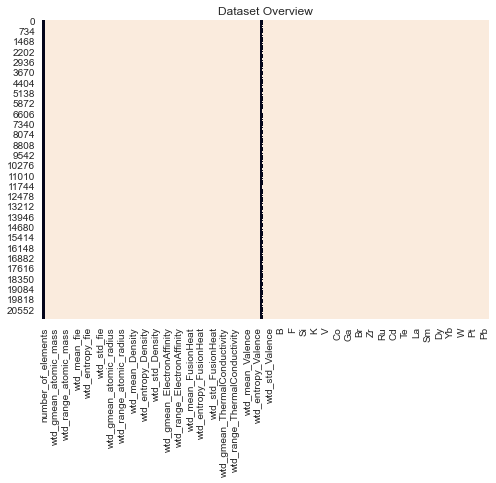

 Categerocial   Numeric   NaN 


In [20]:
dic_cols = {col:utils_recognize_type(X, col, max_cat=10) for col in X.columns}
heatmap = X.isnull()
for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
heatmap
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

### Chekcing Multicollinearity

In [21]:
#num_var_one = X.iloc[:,0:20]
#corr_heatmap(num_var_one)

In [22]:
#num_var_two = X.iloc[:,20:40]

#corr_heatmap(num_var_two)

In [23]:
#num_var_three = X.iloc[:,40:60]

#corr_heatmap(num_var_three)

In [24]:
#num_var_four = X.iloc[:,60:80]

#corr_heatmap(num_var_four)

#### We can observe that columns with individual elements are less corelated

In [25]:
#num_var_four = X.iloc[:,80:100]

#corr_heatmap(num_var_four)

In [26]:
#num_var_four = X.iloc[:,120:140]

#corr_heatmap(num_var_four)

### Variance Inflation Factor

This is what we need to do for this dataset for identifying multicolinearity because the corr heatmap is not considering all at once.

In [ ]:
vif_scores = calculate_vif(X)

In [20]:
vif_scores = vif_scores.sort_values(['VIF_score'], ascending=False).reset_index(drop=True)
vif_scores[vif_scores.VIF_score > 10]

NameError: name 'vif_scores' is not defined

We would need to discard one of these variables with high vif score before moving on to model building. However if we use L1 or LASSO multicolinearity would not be a problem.

In [21]:
# Train test split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [22]:
# Train test dataset statistic report
print("X_train shape:", X_train.shape, "| X_test shape:", X_test.shape)
print("y_train mean:", round(np.mean(y_train),2))
print("y_test mean:", round(np.mean(y_test),2))

X_train shape: (17010, 158) | X_test shape: (4253, 158)
y_train mean: critical_temp    34.4
dtype: float64
y_test mean: critical_temp    34.5
dtype: float64


In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs = -1)
lr_model = lr.fit(X_train,y_train)
lr_model.coef_

array([[ 3.24974882e-01,  8.66371029e-01, -1.15748802e+00,
        -4.37974764e-01,  6.60064755e-01, -2.50201480e+01,
         9.02079955e+00,  1.97076928e-01,  1.02449327e-01,
        -5.19283491e-01,  1.24890262e-02, -1.70987785e-01,
         6.07018143e-02,  1.37723807e-01, -2.10251201e-02,
         7.62577365e-01,  5.73659769e+01,  5.79439378e-02,
         2.06317671e-02, -1.14763663e-01, -4.29375513e-02,
        -7.89676561e-01,  2.10666924e+00,  5.41749975e-01,
        -1.87003656e+00, -2.86218770e+01,  1.42939278e+01,
         4.41665123e-02, -7.07730055e-02, -2.20131058e-01,
        -4.94690929e-02, -5.64200034e-03,  4.93944213e-03,
         1.05082027e-03, -4.12036325e-04, -3.29366179e+00,
        -4.72633252e+00, -9.68212647e-04, -6.19259155e-04,
         3.76816260e-03, -1.18858521e-03, -8.14894676e-02,
         3.77516971e-01,  1.46984619e-01, -4.63760477e-01,
         9.07015051e+00, -1.78934819e+01, -3.52969839e-01,
        -5.61735350e-02,  1.20143751e+00, -5.10629412e-0

In [25]:
#### Scaling data and Cross validation splitter
# Time to scale the data using Standard scaler

X_train_scaled = scale_data(X_train)
X_test_scaled = scale_data(X_test)


#type(X_train_scaled) ##numpy.ndarray
#X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X.columns)
#X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X.columns)


# Cross validation splitter
regularization_splitter = model_selection.KFold(n_splits=5, shuffle=True, random_state=1234)

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs = -1 )
lr_model_scaled = lr.fit(X_train_scaled,y_train)
lr_model_scaled.coef_

array([[ 4.67780515e-01,  2.58726394e+01, -3.88463014e+01,
        -1.36491731e+01,  2.42215448e+01, -9.12180521e+00,
         3.62241184e+00,  1.07730383e+01,  2.76140335e+00,
        -1.03976537e+01,  2.49537720e-01, -1.49182501e+01,
         8.68899136e+00,  1.07621345e+01, -2.51572900e+00,
         2.91423201e-01,  1.91827212e+01,  1.78909564e+01,
         4.62062943e+00, -1.25932612e+01, -5.48615733e+00,
        -1.59224629e+01,  6.07135124e+01,  1.19668647e+01,
        -6.70317025e+01, -1.07522363e+01,  5.82887880e+00,
         2.97461922e+00, -2.48266702e+00, -5.05347313e+00,
        -1.25348455e+00, -1.61518679e+01,  1.59511570e+01,
         3.90442101e+00, -1.64087463e+00, -1.12883900e+00,
        -1.51370010e+00, -3.97130968e+00, -1.49138070e+00,
         6.31081825e+00, -1.91545738e+00, -2.24626006e+00,
         1.21545562e+01,  4.24253537e+00, -1.46200623e+01,
         3.12197709e+00, -5.11785206e+00, -2.06166436e+01,
        -1.61009373e+00,  2.60405073e+01, -1.04247506e+0

In [30]:
alphas = np.linspace(1,0,100)

# Instantiate the linear model and visualizer
lasso_model = linear_model.LassoCV(cv=regularization_splitter, alphas=alphas, n_jobs=-1, random_state=1234)
well_fit = lasso_model.fit(X_train_scaled, y_train)
print("best alpha: ",str(well_fit.alpha_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39973.54068315029, tolerance: 1602.1310407612882
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24348.344916332513, tolerance: 1577.7555180918137
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not conv

best alpha:  0.23232323232323226


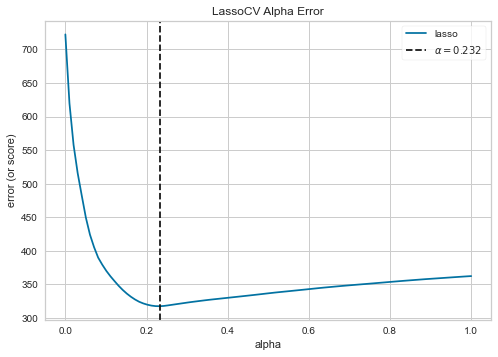

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [31]:
# Visualize best alpha
visualizer = AlphaSelection(lasso_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.show()


### Lasso L1 regularization feature selection using SelectFromModel

In [32]:
feature_names = X_train.columns
## L1 regularization
selector = feature_selection.SelectFromModel(estimator = linear_model.Lasso(alpha=well_fit.alpha_, fit_intercept=True), max_features=15).fit(X_train_scaled,y_train)
L1_regularization_selected_features_SelectFromModel = feature_names[selector.get_support()]


In [33]:
L1_regularization_selected_features_SelectFromModel

Index(['wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_std_atomic_mass',
       'range_atomic_radius', 'wtd_gmean_ElectronAffinity',
       'wtd_entropy_ElectronAffinity', 'wtd_mean_ThermalConductivity',
       'wtd_gmean_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'wtd_std_ThermalConductivity', 'wtd_std_Valence', 'Si', 'Ca', 'Ba',
       'Bi'],
      dtype='object')

In [34]:
### Lasso L1 regularization feature selection

In [35]:
lass_reg_tunned = linear_model.Lasso(alpha=well_fit.alpha_,random_state=1234,selection='random',warm_start=True)
lass_reg_tunned.fit(X_train_scaled,y_train)

Lasso(alpha=0.23232323232323226, random_state=1234, selection='random',
      warm_start=True)

In [36]:
coef_df = pd.DataFrame(lass_reg_tunned.coef_,X.columns,columns=['Coefficients']).reset_index()
coef_df = coef_df.rename(columns=({'index':'Features'}))
coef_df = coef_df.sort_values(by='Coefficients',ascending=False)
feature_imp = coef_df.head(15)
print(feature_imp)
L1_regularization_selected_features = feature_imp['Features'].tolist()

                            Features  Coefficients
62      wtd_mean_ThermalConductivity     11.048030
131                               Ba      8.398728
7                  range_atomic_mass      6.170209
157                               Bi      4.095315
6            wtd_entropy_atomic_mass      3.354958
70       wtd_std_ThermalConductivity      3.073137
66   wtd_entropy_ThermalConductivity      2.548031
27               range_atomic_radius      2.283810
97                                Ca      2.025877
56            wtd_entropy_FusionHeat      1.649812
154                               Hg      1.569314
155                               Tl      1.051363
38                 wtd_range_Density      0.967963
13                         gmean_fie      0.962673
49              std_ElectronAffinity      0.823484


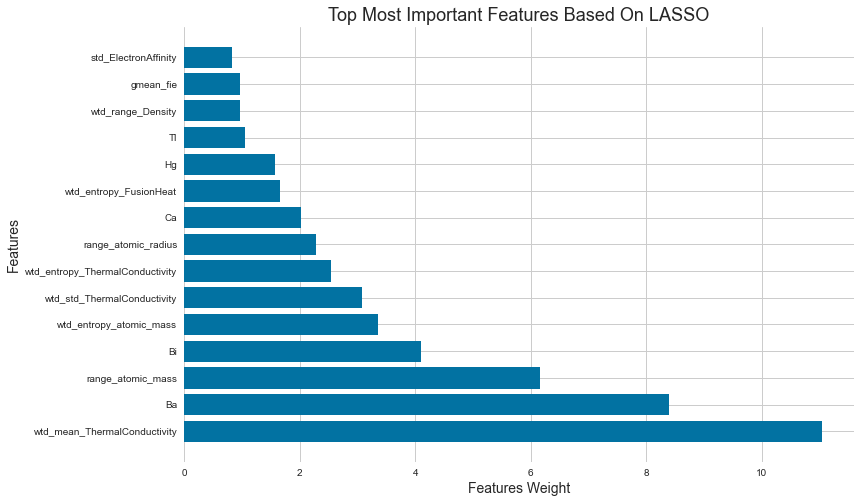

In [39]:
plt.figure(figsize=(12,8))

plt.barh('Features','Coefficients',data=feature_imp)
plt.title('Top Most Important Features Based On LASSO',size=18)
plt.xlabel('Features Weight',size=14)
plt.ylabel('Features',size=14)
plt.rcParams['axes.spines.right']=False # remove the plot border
plt.rcParams['axes.spines.left']=False # remove the plot border
plt.rcParams['axes.spines.top']=False # remove the plot border
plt.rcParams['axes.spines.bottom']=False # remove the plot border
plt.show()

### Ridge Regression L2 model for predicting Critical Temperature

#### Based on the Lasso Regression L1 we have identified important features for fitting the model using Ridge Regression L2

###### Using important features from L1_regularization_selected_features


###### Running Ridge Regression L2 with features selected using sklearn SelectFromModel and Lasso L1

In [44]:
# Train data with important features
X_train_scaled_imp_features_SelectFromModel = X_train_scaled[L1_regularization_selected_features_SelectFromModel.tolist()]
X_train_scaled_imp_features = X_train_scaled[L1_regularization_selected_features]

#test data with important features

X_test_scaled_imp_features_SelectFromModel = X_test_scaled[L1_regularization_selected_features_SelectFromModel.tolist()]
X_test_scaled_imp_features = X_test_scaled[L1_regularization_selected_features]

In [41]:
# selecting alpha range for Ridge regression
alphas = np.linspace(10, 0, 1000)

In [50]:
#ridgecv = linear_model.RidgeCV(cv = regularization_splitter, alphas = alphas, scoring = 'neg_mean_squared_error') #1.0
ridgecv = linear_model.RidgeCV(cv = regularization_splitter, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train_scaled_imp_features_SelectFromModel, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
        cv=KFold(n_splits=5, random_state=1234, shuffle=True),
        scoring='neg_mean_squared_error')

In [51]:
ridgecv.alpha_

0.1

In [91]:
ridge_model = linear_model.Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(X_train_scaled_imp_features_SelectFromModel, y_train)             # Fit a ridge regression on the training data
ridge_pred = ridge_model.predict(X_test_scaled_imp_features_SelectFromModel)           # Use this model to predict the test data

In [90]:
#evaluate model performance using metrics
evl_metric(y_test, ridge_pred)

,MSE,RMSE,MAE
0,337.321995,18.366328,13.807479


#### Residual Plot

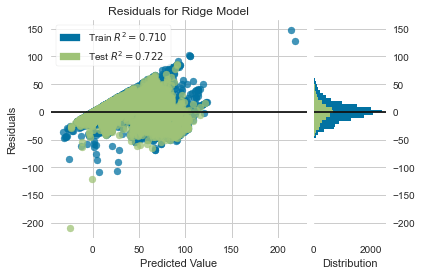

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [99]:

visualizer = ResidualsPlot(ridge_model)

visualizer.fit(X_train_scaled_imp_features_SelectFromModel, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled_imp_features_SelectFromModel, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [92]:
#Feature Coefficients
pd.DataFrame({"Feature":X_train_scaled_imp_features_SelectFromModel.columns, "coefficient":ridge_model.coef_[0]})

,Feature,coefficient
0,wtd_entropy_atomic_mass,2.624752
1,range_atomic_mass,9.479234
2,wtd_std_atomic_mass,-6.925623
3,range_atomic_radius,4.819080
4,wtd_gmean_ElectronAffinity,-3.456748
5,wtd_entropy_ElectronAffinity,-4.786677
6,wtd_mean_ThermalConductivity,14.031818
7,wtd_gmean_ThermalConductivity,-13.245068
8,wtd_entropy_ThermalConductivity,4.196701
9,wtd_std_ThermalConductivity,1.084635


###### Running Ridge Regression L2 with features selected using Lasso L1

In [53]:
#ridgecv2 = linear_model.RidgeCV(scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train_scaled_imp_features, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
        cv=KFold(n_splits=5, random_state=1234, shuffle=True),
        scoring='neg_mean_squared_error')

In [54]:
ridgecv.alpha_

10.0

In [93]:
ridge_model2 = linear_model.Ridge(alpha = ridgecv.alpha_)
ridge_model2.fit(X_train_scaled_imp_features, y_train)             # Fit a ridge regression on the training data
ridge_pred2 = ridge_model2.predict(X_test_scaled_imp_features)           # Use this model to predict the test data

In [96]:
# Print coefficients
pd.DataFrame({"Feature":X_train_scaled_imp_features.columns, "coefficient":ridge_model2.coef_[0]}) 

,Feature,coefficient
0,wtd_mean_ThermalConductivity,1.648800
1,Ba,8.542673
2,range_atomic_mass,-0.982518
3,Bi,4.347966
4,wtd_entropy_atomic_mass,5.062892
5,wtd_std_ThermalConductivity,12.952746
6,wtd_entropy_ThermalConductivity,1.143270
7,range_atomic_radius,4.493071
8,Ca,3.960458
9,wtd_entropy_FusionHeat,-0.915146


In [95]:
#Evaluate model performance
evl_metric(y_test, ridge_pred2)

,MSE,RMSE,MAE
0,408.822597,20.219362,15.567965


#### Residual Plot

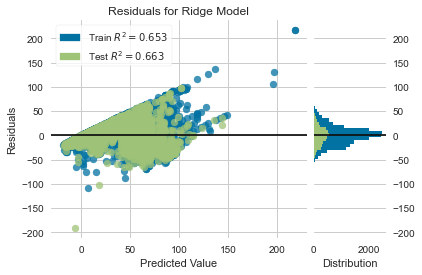

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [98]:

visualizer = ResidualsPlot(ridge_model2)

visualizer.fit(X_train_scaled_imp_features, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled_imp_features, y_test)  # Evaluate the model on the test data
visualizer.show()  